## Smile Detection

First we fetch and save the path of our images.

In [1]:
import os
import fnmatch

def list_all_files(directory, extensions=None):
    for root, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            base, ext = os.path.splitext(filename)
            joined = os.path.join(root, filename)
            if extensions is None or ext.lower() in extensions:
                yield joined

negative_paths = list(list_all_files('Dataset/Negatives/', ['.jpg']))
positive_paths = list(list_all_files('Dataset/Positives/', ['.jpg']))
print (negative_paths[1])
examples = [(path, 0) for path in negative_paths] + [(path, 1) for path in positive_paths]
print (examples[3000])


Dataset/Negatives/file2164.jpg
('Dataset/Positives/file1163.jpg', 1)


Now we read our images, convert them from RGB to Grayscale and resize them all to be 180*192 pixels.

float32 0.0 1.0 (4000, 64, 60)
int32 0 1 (4000,)


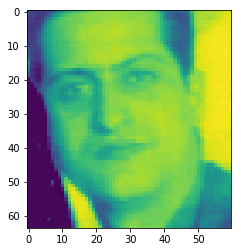

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.io import imread
from skimage.measure import block_reduce

flag = False
x_train = []
y_train = []

for path,label in examples :
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image,(180,192))
    image = block_reduce(image, block_size=(3, 3), func=np.mean)
    if flag == False :
        imgplot = plt.imshow(image)
        flag = True
    x_train.append(image)
    y_train.append(label)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_train = x_train.astype(np.float32) / 255.
y_train = y_train.astype(np.int32)
print (x_train.dtype, x_train.min(), x_train.max(), x_train.shape)
print (y_train.dtype, y_train.min(), y_train.max(), y_train.shape)

Now we convert our labels to vector format so we can add categories later.

In [3]:
from keras.utils import np_utils
number_of_categories = 2
y_train = np_utils.to_categorical(y_train, number_of_categories).astype(np.float32)

#shuffle data
indices = np.arange(len(x_train))
temp_x = x_train
temp_y = y_train
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]



Using TensorFlow backend.


[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]


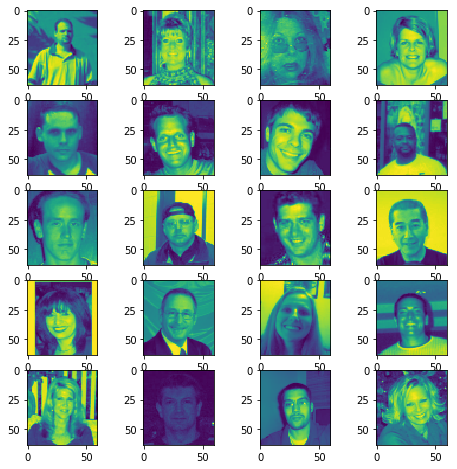

In [4]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    print(y_train[i])
plt.show()


Now we split our data for train and test, and then we build our CNN model. 

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
x_train = np.expand_dims(x_train, axis=-1)
(trainX, testX, trainY, testY) = train_test_split(x_train, y_train, test_size=0.20, random_state=1)



filters = 32
conv_size = 3
pool_size = 2
print(trainX.shape)
network = Sequential()
network.add(layers.Conv2D(filters,(conv_size,conv_size),activation="relu",input_shape=trainX.shape[1:]))
network.add(layers.MaxPooling2D((pool_size,pool_size)))
network.add(layers.Conv2D(filters*2,(conv_size,conv_size),activation="relu"))
network.add(layers.MaxPooling2D((pool_size,pool_size)))
network.add(layers.Conv2D(filters,(conv_size,conv_size),activation="relu"))
network.add(layers.MaxPooling2D((pool_size,pool_size)))
network.add(layers.Flatten())
network.add(Dense(64, activation='relu'))
network.add(Dense(number_of_categories, activation='softmax'))

network.summary()

(3200, 64, 60, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 58, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 960)               0  

## Compile Model

In [6]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = network.fit(trainX, trainY, epochs=10)

Epoch 1/10
3200/3200 [==============================] - 16s 5ms/step - loss: 0.6855 - acc: 0.5506
Epoch 2/10
3200/3200 [==============================] - 14s 4ms/step - loss: 0.6695 - acc: 0.6000
Epoch 3/10
3200/3200 [==============================] - 14s 4ms/step - loss: 0.6403 - acc: 0.6478
Epoch 4/10
3200/3200 [==============================] - 15s 5ms/step - loss: 0.5779 - acc: 0.7113
Epoch 5/10
3200/3200 [==============================] - 14s 4ms/step - loss: 0.5124 - acc: 0.7594
Epoch 6/10
3200/3200 [==============================] - 15s 5ms/step - loss: 0.4489 - acc: 0.7950
Epoch 7/10
3200/3200 [==============================] - 17s 5ms/step - loss: 0.3984 - acc: 0.8234
Epoch 8/10
3200/3200 [==============================] - 15s 5ms/step - loss: 0.3535 - acc: 0.8453
Epoch 9/10
3200/3200 [==============================] - 13s 4ms/step - loss: 0.3130 - acc: 0.8594
Epoch 10/10
3200/3200 [==============================] - 15s 5ms/step - loss: 0.2764 - acc: 0.8838


In [7]:
score = network.evaluate(testX, testY)

print('Test score:', score[0])
print('Test accuracy:', score[1])

800/800 [==============================] - 1s 2ms/step
Test score: 0.446007684469223
Test accuracy: 0.80875


dict_keys(['loss', 'acc'])


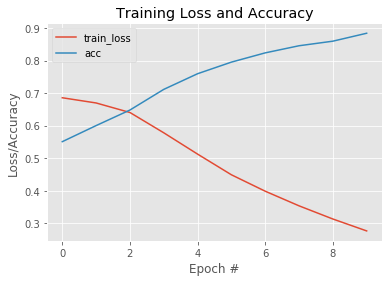

In [8]:
history_dict = history.history
print(history_dict.keys())

plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
# plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["acc"], label="acc")
# plt.plot(history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Neutral -----###--------------------------------------------- Smiling


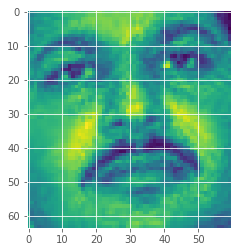

In [38]:
negative_test_paths = list(list_all_files('Dataset/Test/Neutral', ['.jpg']))
positive_test_paths = list(list_all_files('Dataset/Test/Smile', ['.jpg']))

test_images = []
t_image = cv2.imread(negative_test_paths[0])
t_image = cv2.cvtColor(t_image, cv2.COLOR_BGR2GRAY)
t_image = cv2.resize(t_image,(60,64))
test_images.append(t_image)

plt.imshow(t_image)
test_images = np.asarray(test_images)
test_images = test_images.astype(np.float32) / 255.

test_images = np.expand_dims(test_images, axis=-1)
probabilities = network.predict(np.array([test_images[0]]))[0]

class_names = ["Neutral","Smiling"]
bar_width = 50
left_count = int(probabilities[1] * bar_width)
right_count = bar_width - left_count
left_side = '-' * left_count
right_side = '-' * right_count
print (class_names[0], left_side + '###' + right_side, class_names[1])


[0.07605162 0.9239484 ]
Neutral ----------------------------------------------###---- Smiling


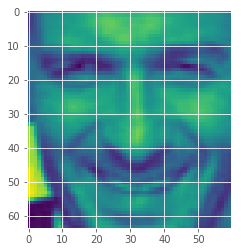

In [35]:
test_images = []
t_image = cv2.imread(positive_test_paths[0])
t_image = cv2.cvtColor(t_image, cv2.COLOR_BGR2GRAY)
t_image = cv2.resize(t_image,(60,64))
test_images.append(t_image)

plt.imshow(t_image)
test_images = np.asarray(test_images)
test_images = test_images.astype(np.float32) / 255.

test_images = np.expand_dims(test_images, axis=-1)
probabilities = network.predict(np.array([test_images[0]]))[0]

print(probabilities)
class_names = ["Neutral","Smiling"]
bar_width = 50
left_count = int(probabilities[1] * bar_width)
right_count = bar_width - left_count
left_side = '-' * left_count
right_side = '-' * right_count
print (class_names[0], left_side + '###' + right_side, class_names[1])